In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
directory = "./Logs/"
save_path = "./Saved/"

In [3]:
from load_logs import *

In [4]:
import pandas as pd
import numpy as np
import re
import sys


In [5]:
logs, log_labels = load_log_files(directory)

In [6]:
save_log_file_label(save_path, logs, log_labels)

In [25]:
np.array(log_labels)

array(['2\n', '9\n', '8\n', ..., '0\n', '4\n', '9\n'], dtype='<U2')

In [9]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [10]:
len(logs)

27093

In [11]:
df = pd.DataFrame(logs)

In [12]:
dfLabel = pd.DataFrame(log_labels)

In [13]:
dfLabel[0].value_counts()

3\n    3012
2\n    3000
4\n    3000
6\n    3000
1\n    3000
0\n    3000
9\n    2999
8\n    2997
5\n    1691
7\n    1394
Name: 0, dtype: int64

In [14]:
dfLabel.shape

(27093, 1)

In [15]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set(style='white', context='poster', rc={'figure.figsize':(18,14)})
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [21]:
from evaluation import *
from features import *
from visualize import *

In [19]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [31]:
labels_ = [int(x.strip()) for x in labels_ ]

/home/nk/miniconda3/envs/project/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


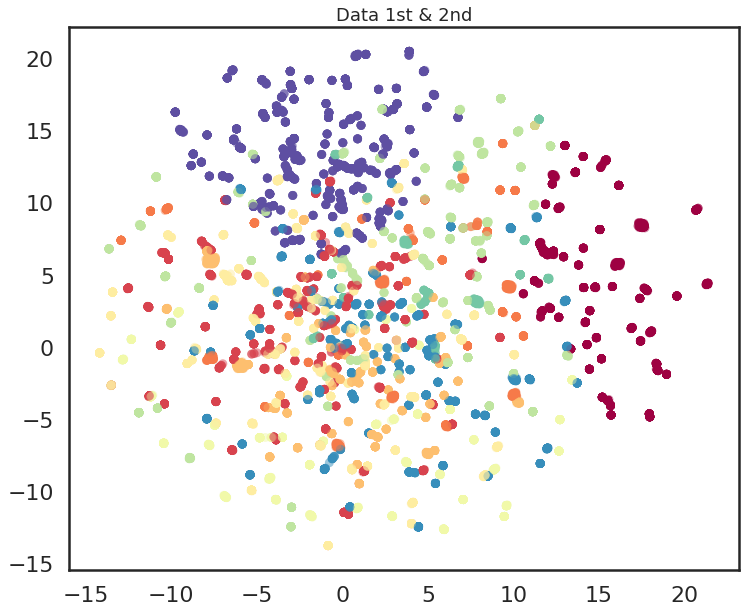

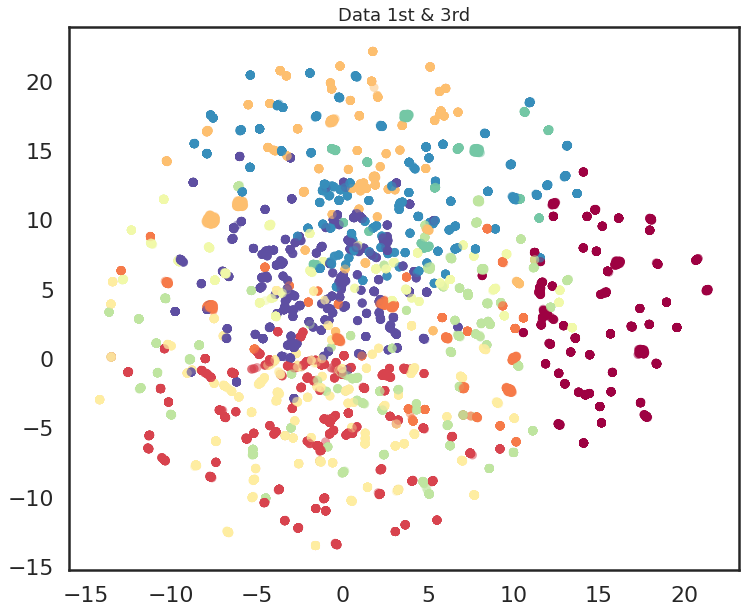

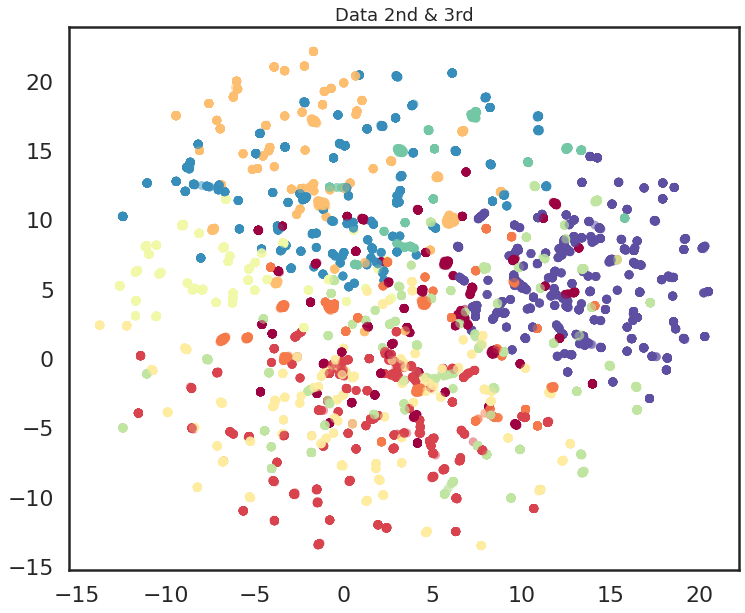

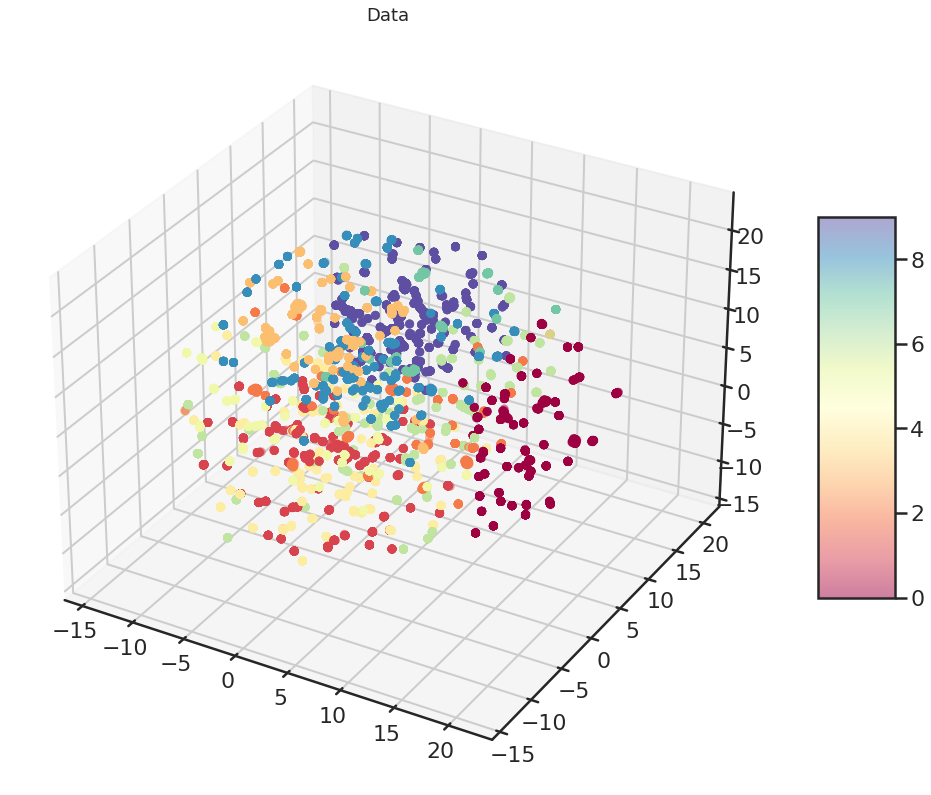

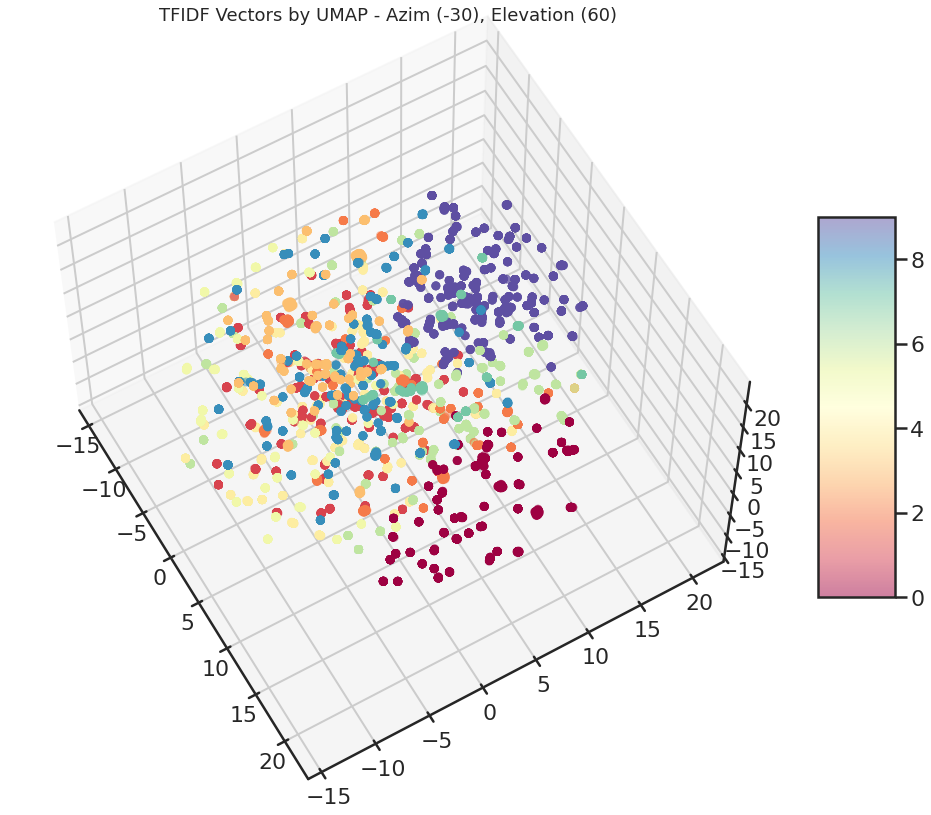

In [33]:
plot_clusters("Data", X, labels_)